In [92]:
import numpy as np
import matplotlib.pyplot as plt

# Домашня робота № 2 «Чисельні методи наближення функцій. Чисельні методи розв’язування СЛАР.»
### Варіант 1
## 1.
Побудувати інтерполяційний многочлен Лагранжа $L_n(x)$ для функції $f(x)$, що задана таблицею, та обчислити значення функції у заданих точках. 
Побудувати графік інтерполяційної функції $y = L_n(x)$ за наявним набором точок. Для виконання завдання розробити програму на одній з мов програмування.



Value table
|$x_i$|-2|-1|0|1|
|:-:|:-:|:-:|:-:|:-:|
|$f(x_i)$|-7|4|1|2|


#### Інтерполяційний многочлен Лагранжа n-го порядку: $L_n(x) = \sum_{i=0}^{n}y_i\frac{(x-x_0)...(x-x_{i-1})(x-x_{i+1})...(x-x_{n})}{(x_i-x_0)...(x_i-x_{i-1})(x_i-x_{i+1})...(x_i-x_n)}$

$n = 3$ (4 points)

$$
    L_3(x) = y_0\frac{(x-x_1)(x-x_2)(x-x_3)}{(x_0-x_1)(x_0-x_2)(x_0-x_3)} + y_1\frac{(x-x_0)(x-x_2)(x-x_3)}{(x_1-x_0)(x_1-x_2)(x_1-x_3)} \\
    + y_2\frac{(x-x_0)(x-x_1)(x-x_3)}{(x_2-x_0)(x_2-x_1)(x_2-x_3)} + y_3\frac{(x-x_0)(x-x_1)(x-x_2)}{(x_3-x_0)(x_3-x_1)(x_3-x_2)}
$$
$x_0 = -2$  
$x_1 = -1$  
$x_2 = 0$  
$x_3 = 1$  
$y_0 = f_0(x_0) = -7$  
$y_1 = f_1(x_1) = 4$  
$y_2 = f_2(x_2) = 1$  
$y_3 = f_3(x_3) = 2$  

$    L_3(x) = -7\frac{(x+1)(x-0)(x-1)}{(-2+1)(-2-0)(-2-1)} + 4\frac{(x+2)(x-0)(x-1)}{(-1+2)(-1-0)(-1-1)} + 1\frac{(x+2)(x+1)(x-1)}{(0+2)(0+1)(0-1)} + 2\frac{(x+2)(x+1)(x-0)}{(1+2)(1+1)(1-0)} \\
= 7\frac{x^3-x}{6} + 4\frac{x^3+x^2-2x}{2} + \frac{x^3+2x^2-x-2}{-2} + 2\frac{x^3+3x^2+2x}{6} \\
= \frac{7(x^3-x)}{6} + \frac{12(x^3+x^2-2x)}{6} + \frac{-3(x^3+2x^2-x-2)}{6} + \frac{2(x^3+3x^2+2x)}{6} \\
= (7x^3 - 7x + 12x^3 + 12x^2 - 24x - 3x^3 - 6x^2 + 3x + 6 + 2x^3 + 6x^2 + 4x) * 1/6 \\
= 3 * x^3 + 2 * x^2 - 4 * x + 1$ 

Points  
|$x_i$|-3|-1.5|0.5|1.5|
|:-:|:-:|:-:|:-:|:-:|
|$L(x_i)$|?|?|?|?|

$x_0 = -3$  
$x_1 = -1.5$  
$x_2 = 0.5$  
$x_3 = 1.5$  

$L_3(x_0) = 3 * (-3)^3 + 2 * (-3)^2 - 4(-3) + 1 = -50$  
$L_3(x_1) = 3 * (-1.5)^3 + 2 * (-1.5)^2 - 4(-1.5) + 1 = 1.375$  
$L_3(x_2) = 3 * (0.5)^3 + 2 * (0.5)^2 - 4(0.5) + 1 = -0.125$  
$L_3(x_3) = 3 * (1.5)^3 + 2 * (1.5)^2 - 4(1.5) + 1 = 9.625$  



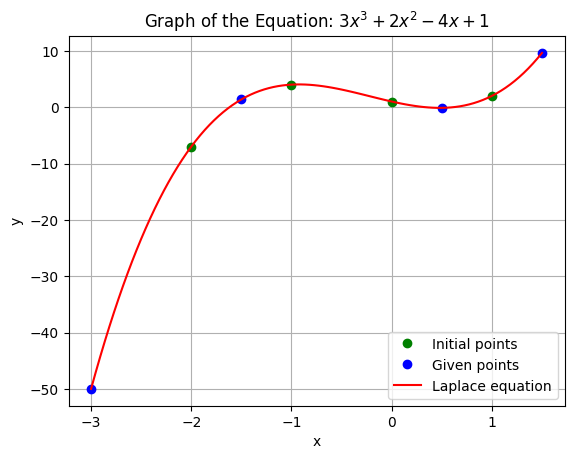

In [97]:
x_init_values = [-2, -1, 0, 1]
y_init_values = [-7, 4, 1, 2]
x_values = [-3, -1.5, 0.5, 1.5]
y_values = [-50, 1.375, -0.125, 9.625]

def base_equation(x):
    return 3 * x**3 + 2 * x**2 - 4 * x + 1

x_base = np.linspace(min(x_values), max(x_values), 100)
y_base = base_equation(x_base)


plt.plot(x_init_values, y_init_values, 'go', label='Initial points')
plt.plot(x_values, y_values, 'bo', label='Given points')
plt.plot(x_base, y_base, 'r-', label='Laplace equation')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of the Equation: $3x^3 + 2x^2 - 4x + 1$')


plt.legend()

plt.grid(True)
plt.show()


## 2.
Завдання 3. Знайти з точністю 0,001 розв’язок СЛАР методом Гауса-Зейделя. Для виконання завдання розробити програму на одній з мов програмування.

$3x_1 + 12x_2 + (-1)x_3 + 0x_4 = 18$  
$-5x_1 + 2x_2 + 0x_3 + 32x_4 = 15$  
$2x_1 + 0x_2 + 16x_3 + (-3)x_4 = 0$  
$12x_1 + 3x_2 + 0x_3 + 0x_4 = 21$  



In [90]:
def swap_rows(matrix, i, j):
    temp = np.copy(matrix[i])
    matrix[i] = matrix[j]
    matrix[j] = temp

A = np.array([[3, 12, -1, 0],
              [-5, 2, 0, 32],
              [2, 0, 16, -3],
              [12, 3, 0, 0]], dtype=float)
b = np.array([18, -15, 0, 21], dtype=float)


def gauss_seidel_solver(A, b, max_iterations=100, tolerance=1e-6):
    # Initial guess for the solution
    x = np.array([0, 0, 0, 0], dtype=float)
    
    for iteration in range(max_iterations):
        x_old = x.copy()
        for i in range(len(b)):
            x[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i + 1:], x_old[i + 1:])) / A[i, i]
        
        # Check for convergence
        if np.linalg.norm(x - x_old) < tolerance:
            break
    
    return x


swap_rows(A, 0, 3)
swap_rows(A, 1, 3)
b[0], b[3] = b[3], b[0]
b[1], b[3] = b[3], b[1]

solution = gauss_seidel_solver(A, b, 10)


print("Solution:")
for i in range(len(solution)):
    print(f"x_{i+1} = {solution[i]:.3f}")


Solution:
x_1 = 1.472
x_2 = 1.112
x_3 = -0.242
x_4 = -0.308
